# Subtask 3

In [1]:
# Impoting modules for model building, compiling and training

import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from keras.preprocessing.image import ImageDataGenerator

In [2]:
"""
Changing my current working directory
"""

os.chdir('/content/')


In [3]:
"""
wget basically grabs data for you from web server

"""
!wget https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip

--2021-04-08 07:43:14--  https://www.dropbox.com/s/otc12z2w7f7xm8z/mnistTask3.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/otc12z2w7f7xm8z/mnistTask3.zip [following]
--2021-04-08 07:43:14--  https://www.dropbox.com/s/raw/otc12z2w7f7xm8z/mnistTask3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc233b084e3fd3829aa669f5629.dl.dropboxusercontent.com/cd/0/inline/BMNRlCqJ6TLHZvCdwsVga3M-ukq8L9YRsIgIiSJPX40GGattFivgCKHnrcAoXip2embM02isjJt1FOhWdfn34t71l4rrDnTlT97fADkNpHqJUK8rmsGH01M588i_RARGnhiv6ulyXnSz1Ic7SiSPoPLw/file# [following]
--2021-04-08 07:43:15--  https://ucc233b084e3fd3829aa669f5629.dl.dropboxusercontent.com/cd/0/inline/BMNRlCqJ6TLHZvCdwsVga3M-ukq8L9YRsIgIiSJPX40GGattFivgCKHnrcAoXip2embM02isjJt1FOhWd

In [4]:
"""
Let's unzip the zip file downloaded above
"""

!unzip '/content/mnistTask3.zip'


Streaming output truncated to the last 5000 lines.
 extracting: mnistTask/3/image_021488.jpg  
 extracting: mnistTask/3/image_047540.jpg  
 extracting: mnistTask/3/image_050475.jpg  
 extracting: mnistTask/3/image_024391.jpg  
 extracting: mnistTask/3/image_020193.jpg  
 extracting: mnistTask/3/image_004447.jpg  
 extracting: mnistTask/3/image_051601.jpg  
 extracting: mnistTask/3/image_009900.jpg  
 extracting: mnistTask/3/image_020916.jpg  
 extracting: mnistTask/3/image_025962.jpg  
 extracting: mnistTask/3/image_054889.jpg  
 extracting: mnistTask/3/image_012369.jpg  
 extracting: mnistTask/3/image_025528.jpg  
 extracting: mnistTask/3/image_035609.jpg  
 extracting: mnistTask/3/image_037469.jpg  
 extracting: mnistTask/3/image_057560.jpg  
 extracting: mnistTask/3/image_000119.jpg  
 extracting: mnistTask/3/image_020120.jpg  
 extracting: mnistTask/3/image_044129.jpg  
 extracting: mnistTask/3/image_027779.jpg  
 extracting: mnistTask/3/image_058235.jpg  
 extracting: mnistTask/3/

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,      #creating training generator
                                   data_format='channels_last',
                                   validation_split=0.1)
                                  


val_datagen = ImageDataGenerator(rescale = 1./255,   #creating validation generator
                                   data_format='channels_last',
                                   validation_split=0.1)



"""
ImageDataGenerator is used as Image data augmentation in real-time but here it is used for rescaling and for loading data.
flow_from_directory is used which helps in resizing image and creating batch of themand 
that will be later passed to model as a input.
flow_from_directory automatically infers class label with the folder name. 
"""



training_set = train_datagen.flow_from_directory('/content/mnistTask',     #loading data 
                                                 target_size = (28, 28),
                                                 batch_size = 128,
                                                 class_mode = 'categorical',
                                                 color_mode='grayscale',
                                                 subset="training")

validation_set = val_datagen.flow_from_directory('/content/mnistTask',
                                                 target_size = (28, 28),
                                                 batch_size = 128,
                                                 class_mode = 'categorical',
                                                 color_mode='grayscale',
                                                 subset="validation")


#https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Found 54006 images belonging to 10 classes.
Found 5994 images belonging to 10 classes.


In [6]:
def MiDasNet():
  """
  As we have connections so working with Sequencial Model is not feasibile.
  Hence in this model i'll be using keras Functional API(helps in creating flexible models)

  """
  input=keras.Input(shape=(28,28,1)) #input shape this time is 28*28
  input_2=layers.Conv2D(64,3,kernel_initializer='HeNormal',activation='relu',padding='same')(input)# passing input to this conv2d layer
  input_2=layers.MaxPooling2D(2,2)(input_2) #applying max pooling
  input_3=layers.Conv2D(64,3,padding='same',kernel_initializer='HeNormal',activation='relu')(input_2) #passing input_2 to this conv2d layer


  """
  Now this input_3 will  be used by three layers layer_1,layer_2,layer_3 for leanring more complex features,
  Keep in mind that we are using this with kernal_regularizer.
  """

  layer_1=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_3)#connection from input_3 layer to layer_1
  layer_1=layers.BatchNormalization()(layer_1)
  layer_1=layers.MaxPooling2D(2,2)(layer_1)
  layer_1=layers.Dropout(0.3)(layer_1)

  layer_2=layers.Conv2D(32,1,kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2',padding='same')(input_3)#connection from input_3 layer to layer_2
  layer_2=layers.BatchNormalization()(layer_2)
  layer_2=layers.MaxPooling2D((2,2))(layer_2)
  layer_2=layers.Dropout(0.3)(layer_2)


  """
  Padding here is 'same' for keeping dimentions be equal at ending point of connection.
  """

  layer_3=layers.Conv2D(32,1,kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2',padding='same')(input_3)#connection from input_3 layer to layer_3
  layer_3=layers.BatchNormalization()(layer_3)
  layer_3=layers.MaxPooling2D((2,2))(layer_3)
  layer_3=layers.Dropout(0.3)(layer_3)


  """
  As we have layer_1, layer_2, layer_3 with same output dimention, we can use Add for adding these tensors.
  """

  sum_out=layers.add([layer_1,layer_2,layer_3])
    
  """
  Passing this sum_out layer to a conv2d layers for learning more complex features
  """

  input_2_2=layers.Conv2D(64,3,padding='same',kernel_initializer='HeNormal',activation='relu')(sum_out) 
  input_2_2=layers.MaxPooling2D(2,2)(input_2_2)
  input_2_2=layers.Conv2D(64,3,padding='same',kernel_initializer='HeNormal',activation='relu')(input_2_2)


  """
  Now this input_2_2 will  be used by three layers layer_1_1,layer_2_2,layer_3_3 for leanring more complex features,
  Keep in mind that we are using this with kernal_regularizer.
  """
    
    
  layer_1_1=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_2_2) # input from input_2_2 to layer_1_1
  layer_1_1=layers.BatchNormalization()(layer_1_1)
  layer_1_1=layers.MaxPooling2D(2,2)(layer_1_1)
  layer_1_1=layers.Dropout(0.3)(layer_1_1)

  layer_2_2=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_2_2) # input from input_2_2 to layer_2_2
  layer_2_2=layers.BatchNormalization()(layer_2_2)
  layer_2_2=layers.MaxPooling2D((2,2))(layer_2_2)
  layer_2_2=layers.Dropout(0.3)(layer_2_2)
    
  """
  Padding here is 'same' for keeping dimentions be equal at ending point of connection.
  """

  layer_3_3=layers.Conv2D(32,1,padding='same',kernel_initializer='HeNormal',activation='relu',kernel_regularizer='l2')(input_2_2) # input from input_2_2 to layer_3_3
  layer_3_3=layers.BatchNormalization()(layer_3_3)
  layer_3_3=layers.MaxPooling2D((2,2))(layer_3_3)
  layer_3_3=layers.Dropout(0.3)(layer_3_3)

  """
  As we have layer_1_1, layer_2_2, layer_3_3 with same output dimention, we can use Add for adding these tensors.
  """
  sum_out_2=layers.add([layer_1_1,layer_2_2,layer_3_3])


  sum_out_2=layers.GlobalMaxPool2D()(sum_out_2)  #performing global maximum

  sum_out_2=layers.Flatten()(sum_out_2)# flattens sum_out_2 tensor to 1d tensor 
  out=layers.Dense(10,'softmax')(sum_out_2) #output layer
  model=keras.Model(input,out,name='MiDasNet')# grouping layer into object  https://www.tensorflow.org/api_docs/python/tf/keras/Model
  return model


You can load above model from subtask 2 using 

model_design = open(path_of_architecture, 'r')    # as we already have  this architecture in subtak 2  
model = model_design.read()  
model_design.close()

In [7]:
os.chdir('/content/')

# changing current working directory

In [10]:
"""
Loading weights of previosly trained model,
Next we are going to iterate this model over current loaded dataset 
"""

model=MiDasNet()
model.load_weights('first_modeltask2.h5')
model.summary()

Model: "MiDasNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 28, 28, 64)   640         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 14, 14, 64)   0           conv2d_20[0][0]                  
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 14, 14, 64)   36928       max_pooling2d_16[0][0]           
___________________________________________________________________________________________

In [11]:
"""
Compiling model.
"""

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [12]:
History=model.fit(training_set,verbose=1,epochs=50) # train model for 50 epochs

Epoch 1/50
422/422 [==============================] - 51s 48ms/step - loss: 4.6710 - accuracy: 0.0912
Epoch 2/50
422/422 [==============================] - 19s 45ms/step - loss: 2.3762 - accuracy: 0.1021
Epoch 3/50
422/422 [==============================] - 19s 46ms/step - loss: 2.3425 - accuracy: 0.1063
Epoch 4/50
422/422 [==============================] - 20s 46ms/step - loss: 2.3266 - accuracy: 0.1092
Epoch 5/50
422/422 [==============================] - 20s 46ms/step - loss: 2.3190 - accuracy: 0.1101
Epoch 6/50
422/422 [==============================] - 19s 46ms/step - loss: 2.3069 - accuracy: 0.1138
Epoch 7/50
422/422 [==============================] - 19s 46ms/step - loss: 2.2996 - accuracy: 0.1138
Epoch 8/50
422/422 [==============================] - 19s 46ms/step - loss: 2.2974 - accuracy: 0.1147
Epoch 9/50
422/422 [==============================] - 19s 46ms/step - loss: 2.2950 - accuracy: 0.1140
Epoch 10/50
422/422 [==============================] - 19s 46ms/step - loss: 2.289

In [13]:
model.save('model_subtask3.h5') # saving weights


Seeing this accuracy after 50 epochs in worst than expected,   
This might be due to my model architecture, model's hyper-parameters or in the dataset on which model is training on.

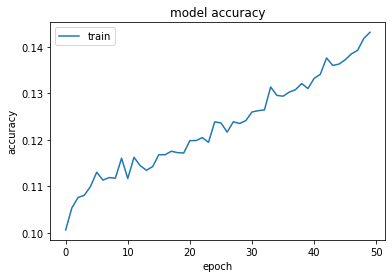

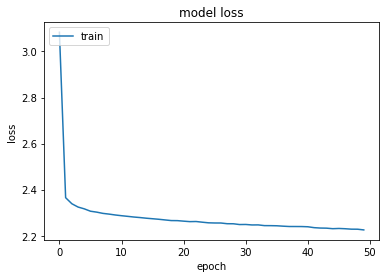

In [14]:
"""
Ploting accuracy v/s epoch graph, Also
Plotting loss v/s epoch graph
"""


plt.plot(History.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


plt.plot(History.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


accuracy increased from 10% to 16%   
loss changed from 2.7 to 2.2   
This model is not performing well over this dataset.   

#### Testing above model on MNIST TEST DATA




Loading this data is very easy as keras provides this dataset.  
Data is in standard train test split i.e.. training set of 60,000 and a test set of 10,000 image dataset

In [15]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

#https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

11493376/11490434 [==============================] - 0s 0us/step


In [16]:
"""
y_test is 1-D array having values from 0-9., 
Performing one-hot encoding on them.
"""

y=tf.one_hot(y_test,10)

In [17]:
"""
Evaluating on mnist test dataset
"""
model.evaluate(x_test, y)

313/313 [==============================] - 2s 6ms/step - loss: 140.0642 - accuracy: 0.0386


[140.06423950195312, 0.038600001484155655]

High Loss and very low accuracy seems like there is something wrong with either model we trained above or dataset.     
Let's check MNIST accuracy on pre-trained model again but this time model will not be    
iterated over current training_Set

In [19]:
"""
Loading another instance of pre- trained model to check accuracy on MNIST Test Dataset
"""
model2=MiDasNet()
model2.load_weights('first_modeltask2.h5')

In [20]:
"""
Compiling this model
"""
model2.compile(tf.keras.optimizers.Adam(learning_rate=0.0003),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [21]:
"""
Time for evaluating on test dataset
"""
model2.evaluate(x_test,y)

313/313 [==============================] - 2s 6ms/step - loss: 0.0527 - accuracy: 0.9897


[0.04373924434185028, 0.9922000169754028]

Very low loss and Very High accuracy. Overall Good Performance.  

Seems like we have problem in dataset and not on the model architecture  

Visualize some images from each classes we have for training in this Subtask will give us some insights about this data.   
In the next step let's visualize them.

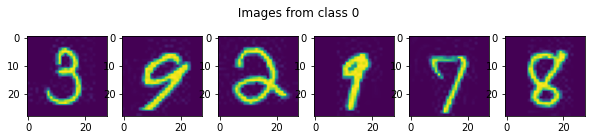

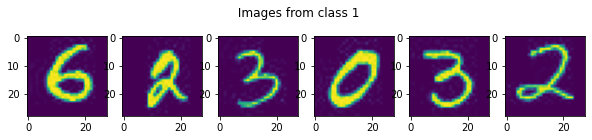

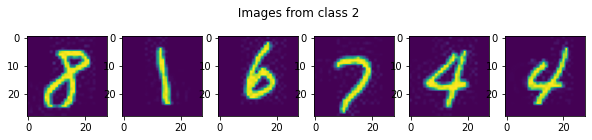

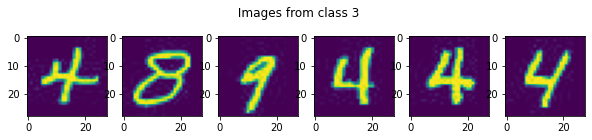

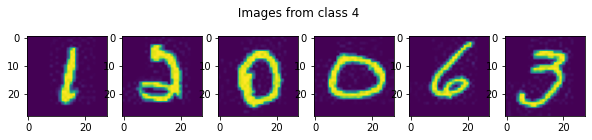

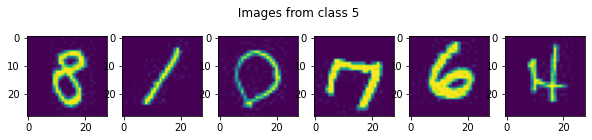

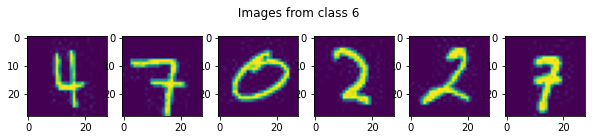

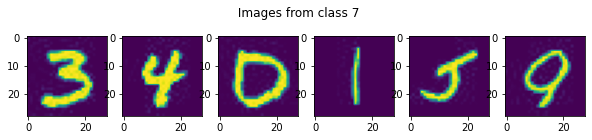

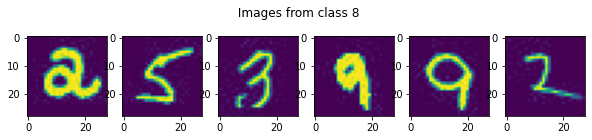

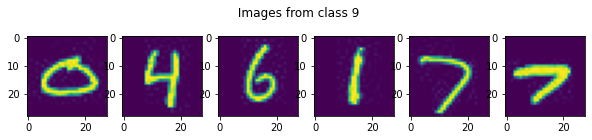

In [22]:
"""
This codeblock prints out 6 images for each class we have in this dataset
"""

columns =6   #num of images that will be shown from each class
rows=10      # total classes 0-9 i.e.. 10 classes
for r in range(rows):
  path='/content/mnistTask/'+str(r)  #file path for each class image dataset
  os.chdir(path) #changing directory to above class path
  y=os.listdir() # listing all the image files name for current class
  fig=plt.figure(figsize=(10, 2))  
  for c in range(columns):  
    img = plt.imread(y[c]) 
    fig.add_subplot(1, columns,c+1)
    fig.suptitle(' Images from class {}'.format(r))
    plt.imshow(img)
  plt.show()


Hence the problem in the dataset was reason behind poor performance of model which iterated over it.

We can easily see that in each class we got images from rest of the classes as well, once we iterate on this data error will bloom and model performance will be worse.

This is due to learning of features, Convolutional layers will learn something from a image which might not be relevent to other image that will create ambiguity in prediction


